## Fase 1: Exploración y Limpieza

In [46]:
# Importamos librerias necesarias para el tratamiento de datos
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

### 1.1. Exploración del csv Flight

In [47]:
# Comenzamos a leer el primer fichero, mostrando las primeras y las últimas  filas de cada archivo
df_flight=pd.read_csv("Customer Flight Activity.csv")
df_flight.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [48]:
df_flight.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [49]:
# Vemos la cantidad de filas y columnas

df_flight.shape
print(df_flight.shape)
print(f"El número de filas de df_flight es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")


(405624, 10)
El número de filas de df_flight es 405624, y el número de columnas es 10


In [50]:
# Vemos el nombre de las columnas que tenemos en df_flight

df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [51]:
# Para ver el tipo de datos

df_flight.info()
# todos los datos son de tipo integer excepto la columna 'points accumulated' que es de tipo float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [52]:
# Vemos las estadísticas descriptivas de las columnas numéricas de df_flight
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


- Observamos que hay algún tipo de dato que tenemos que cambiar como el del "Month" que está puesto en números.
- En vistas generales podemos observar que la mayoría de los usuarios realizan pocos vuelos y muchos no acumulan puntos. Sin embargo, hay una minoría que realiza múltiples vuelos, viaja grandes distancias y acumula más puntos. Las estadísticas también muestran que la actividad se concentra en los años 2017 y 2018, con una distribución uniforme a lo largo del año.

In [53]:
# Comprobamos si hay valores nulos o duplicados
df_flight.isnull().sum()
print(df_flight.isnull().sum())
print("------------------------")
df_flight.duplicated().sum()
print(df_flight.duplicated().sum())

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64
------------------------
1864


In [54]:
# Tenemos valores duplicados en las filas, vamos a verlos para decidir qué hacer con ellos

duplicates_flight = df_flight[df_flight.duplicated()]
duplicates_flight


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [55]:
# Con el código anterior no puedo identifcar el patron
duplicates_flight = df_flight[df_flight.duplicated(keep=False)] # Al añadir keep=False vemos que todas las instancias de duplicados se muestre
print (duplicates_flight)

        Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
41              101902  2017      1               0                        0   
42              101902  2017      1               0                        0   
226             112142  2017      1               0                        0   
227             112142  2017      1               0                        0   
477             126100  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
405111          971370  2018     12               0                        0   
405409          988392  2018     12               0                        0   
405410          988392  2018     12               0                        0   
405436          989528  2018     12               0                        0   
405437          989528  2018     12               0                        0   

        Total Flights  Distance  Points

In [56]:
# Al ver que los duplicados son el loyalty number que repite la misma información en varias filas, decidido proceder a su eliminacion.

df_flight.drop_duplicates(inplace=True) # para que los cambios se guarden en el df_flight uso inplace = True

# Reseteamos el índice del dataframe para que los índices no queden desordenados
df_flight.reset_index(drop=True)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0
403756,999911,2018,12,0,0,0,0,0.0,0,0
403757,999940,2018,12,3,0,3,1233,123.0,0,0
403758,999982,2018,12,0,0,0,0,0.0,0,0


### 1.2. Exploración del csv Loyalty

In [57]:
df_loyalty=pd.read_csv("Customer Loyalty History.csv")
df_loyalty.head()


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [58]:
df_loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [59]:
df_loyalty.shape
print (df_loyalty.shape)
print(f"El número de filas de df_loyalty es {df_loyalty.shape[0]}, y el número de columnas es {df_loyalty.shape[1]}")


(16737, 16)
El número de filas de df_loyalty es 16737, y el número de columnas es 16


In [60]:
# Vemos el nombre de las columnas que tenemos 

df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [61]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [62]:
# Vemos las estadísticas de las columnas numéricas 

df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


- Podemos ver que hay algunas anomalías (como un salario negativo), que posteriormente trataremos. 

In [63]:
# Vemos las estadísticas de las columnas categóricas 

df_loyalty.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


- count: nos indica el número total de valores no nulos para la variable. En este caso, todas las variables tienen 16737, lo que sugiere que no hay valores faltantes para ninguna de estas variables en el conjunto de datos.
- unique: muestra el número de valores distintos (únicos) que existen en la columna correspondiente. Por ejemplo, hay 1 país único (Canada) y 11 provincias diferentes.
- top: Indica el valor que más se repite en la columna correspondiente. Por ejemplo, la provincia más común es "Ontario" y la ciudad más común es "Toronto".
- freq: muestra la frecuencia del valor "top", es decir, cuántas veces aparece el valor más común en la columna. Por ejemplo, "Ontario" aparece 5404 veces, y "Toronto" aparece 3351 veces.

Si estudiamos las filas, podemos observar que este conjunto de datos está enfocado en Canadá, donde la mayoría de las personas son mujeres con un nivel educativo de licenciatura, y están casadas. La provincia más común es Ontario y la ciudad más común es Toronto. La mayoría tienen una tarjeta de lealtad llamada "Star" y están inscritas bajo un tipo de inscripción estándar.

In [64]:
# creamos un dataframe con las columnas categoricas de df_loyalty
df_loyalty_cat = df_loyalty.select_dtypes(include = "object")
df_loyalty_cat.head()

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,Standard
1,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,Standard
2,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,Standard
3,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,Standard
4,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,Standard


In [65]:
# creo un dataframe con las columnas categoricas de df_loyalty
df_loyalty_cat = df_loyalty.select_dtypes(include = "object") # lo que hace el include=object es seleccionar todas las columnas del DataFrame que tienen un tipo de dato "object", es decir, datos categóricos.
df_loyalty_cat.head()

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,Standard
1,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,Standard
2,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,Standard
3,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,Standard
4,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,Standard


In [66]:
# creo una variable con los nombres de las columnas de las variables categóricas del df_loyalty
col_categoricas = df_loyalty_cat.columns
print(f"Las columnas son {col_categoricas}")

# Iteramos por las columnas categoricas de df_loyalty con un bucle para sacar sus valores únicos y sus frecuencias
for columna in col_categoricas:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_loyalty_cat[columna].unique()}\n") # unique() devuelve un array con los valores únicos que existen en esa columna, lo que nos permite entender la diversidad de datos dentro de esa columna.
    print(f"Las frecuencias de los valores únicos son: {df_loyalty_cat[columna].value_counts()} ") # value_counts() cuenta cuántas veces aparece cada valor único en la columna. Es útil para saber qué valores son más o menos comunes en esa columna.

Las columnas son Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY' -----------

Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos son: Country
Canada    16737
Name: count, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE' -----------

Sus valores únicos son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Las frecuencias de los valores únicos son: Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: c

In [67]:
df_loyalty.isnull().sum()
print(df_loyalty.isnull().sum())
print("--------------------")

df_loyalty.duplicated().sum()
print (df_loyalty.duplicated().sum())

print("-----------------------------")


print("El tratamiento de los valores nulos lo haré una vez meregado las tablas ya que si se hace antes de la unión de las tablas,puede afectar a la integridad del datos.")

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64
--------------------
0
-----------------------------
El tratamiento de los valores nulos lo haré una vez meregado las tablas ya que si se hace antes de la unión de las tablas,puede afectar a la integridad del datos.


### 2. Limpieza

In [68]:
# Uno los ficheros en un dataframe final usando un "right" ya que de esta forma aseguramos toda la información del fichero de los vuelos
# Un mismo cliente puede realizar varios vuelos.
df_final = pd.merge(df_loyalty, df_flight, on='Loyalty Number', how='right')
df_final.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200,120.0,0,0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


In [69]:
df_final.shape

(403760, 25)

In [70]:
df_final.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [71]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       301500 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

In [72]:
# Estadísticas numéricas del df final

df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Cancellation Year,49650.0,2016.504350,1.380482,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,49650.0,6.962095,3.454362,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00


In [73]:
# Estadisticos de las columnas categóricas 
df_final.describe(include = "object").T

,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


In [74]:
# aqui podemos observar que la columna "Country" son todas Canadá, por lo que procedo a eliminarla

df_final.drop("Country", axis = 1, inplace = True)

In [75]:
# Vemos el porcentaje de valores nulos que teníamos en df_flight

df_final.isnull().sum() / len(df_final) * 100

Loyalty Number                  0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
dtype: float64

In [76]:
# Vemos que las columnas "Cancellation Year" y "Cancellation Month" tienen más de un 87% de nulos lo que supone una gran cantidad y no aportan información 
# relevante para nuestro análisis, por lo que procedo a eliminarlas.

df_final.drop("Cancellation Year", axis = 1, inplace = True)

In [77]:
df_final.drop("Cancellation Month", axis = 1, inplace = True)

In [78]:
# Compruebo que se hayan eliminado correctamente
df_final.columns

Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [79]:
# En la columna "Salary" antes hemos visto que hay valores negativos, hago el cambio a positivos y para los nulos usaré la mediana

df_final['Salary'] = df_final['Salary'].abs() 


In [80]:
df_final['Salary'].fillna(df_final['Salary'].median(), inplace=True)

In [81]:
# Hacemos la comprobación después de haber tratado los nulos

df_final.isnull().sum() / len(df_final) * 100

Loyalty Number                 0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Salary                         0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Enrollment Year                0.0
Enrollment Month               0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [82]:
# Voy a convertir los números de los meses a nombres para que sea más fácil la lectura, para ello creo un diccionario para mapear 
month_mapping = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April',
        5: 'May', 6: 'June', 7: 'July', 8: 'August',
        9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    
df_final['Month'] = df_final['Month'].map(month_mapping)


In [83]:
# Comprobamos
df_final.head()

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,2017,January,3,0,3,1521,152.0,0,0
1,100102,Ontario,Toronto,M1R 4K3,Male,College,73479.0,Single,Nova,2887.74,Standard,2013,3,2017,January,10,4,14,2030,203.0,0,0
2,100140,British Columbia,Dawson Creek,U5I 4F1,Female,College,73479.0,Divorced,Nova,2838.07,Standard,2016,7,2017,January,6,0,6,1200,120.0,0,0
3,100214,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,2017,January,0,0,0,0,0.0,0,0
4,100272,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,2017,January,0,0,0,0,0.0,0,0


## Fase 2. Visualización

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

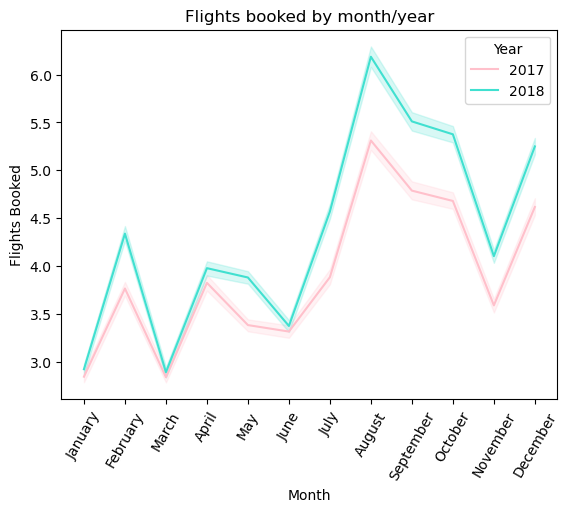

In [103]:
# Realizo un lineplot. Lineplot se utiliza para visualizar datos que están organizados en series temporales o en secuencias ordenadas

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
sns.lineplot(x = "Month", y = "Flights Booked", hue = "Year", data=df_final, palette= ["pink", "turquoise"])
plt.title("Flights booked by month/year")
plt.xticks(ticks=range(len(month_order)), labels=month_order, rotation=60);


 Podemos ver que ambos años siguen la msima tendencia de alza de reservas durante los meses de verano seguido de febrero y las mismas bajas en los mismos meses. También podemos observar que en 2018 se han realizado más reservas en todos los meses.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

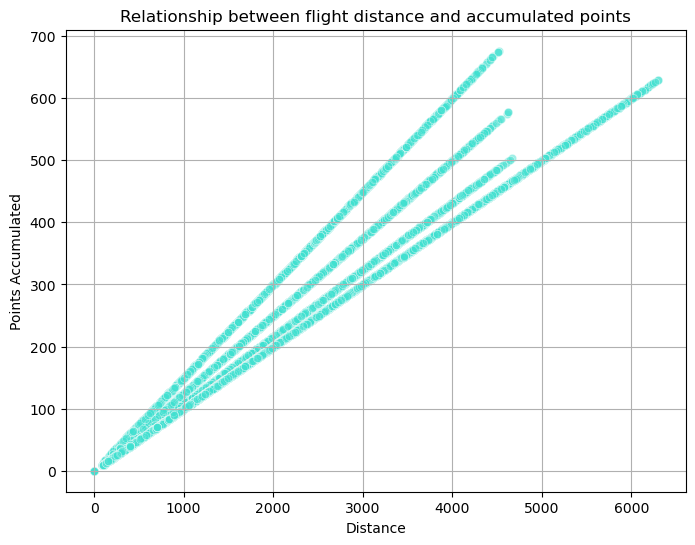

In [127]:
# Voy a realizar un scatterplot, que es ideal para visualizar cómo se relacionan dos variables numéricas. 
# Configurar tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear scatter plot
sns.scatterplot(x="Distance", y="Points Accumulated",  color="turquoise",data=df_final, alpha=0.5)

# cambiamos el nombre del título y los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' 
plt.title("Relationship between flight distance and accumulated points")
plt.xlabel("Distance")
plt.ylabel("Points Accumulated")
plt.grid(True)
plt.show()

Podemos observar que existe una relación lineal positiva entre las variables,distancia de vuelos y puntos acumulados. Por tanto, podemos concluir que, a mayor distancia recorrida en un vuelo, mayor número de puntos acumulados

3. ¿Cuál es la distribución de los clientes por provincia o estado?

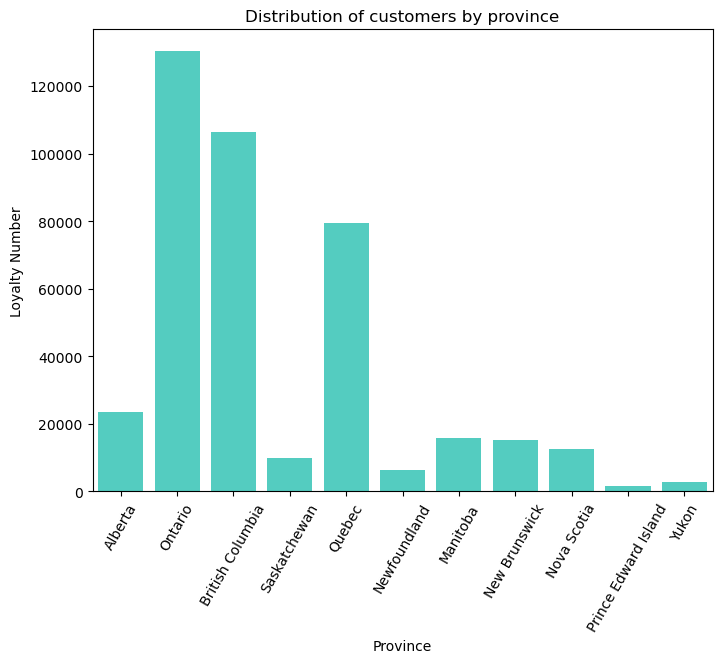

In [193]:
# Elijo hacer un gráfico countplot ay que se utiliza para mostrar la frecuencia de cada categoria

plt.figure(figsize=(8,6))
sns.countplot(x = "Province", 
              data = df_final,
              color = "turquoise", 
             )

# giramos las etiquetas del eje "x", en este caso a 60º. 
plt.xticks(rotation = 60)

plt.title("Distribution of customers by province")
plt.xlabel("Province")
plt.ylabel("Loyalty Number");

Podemos observar que la provincia con mayor cantidad de clientes es Ontario seguido de British Columbia y Quebec.


4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

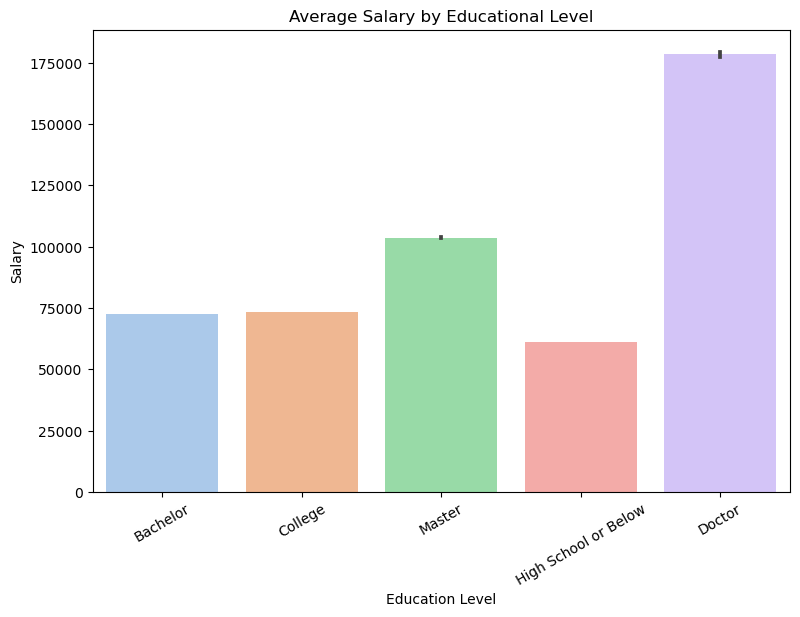

In [192]:
# elijo un barplot que me muestra de una manera clara las relaciones entre dos variables una númerica y otra categórica, aunque también podriamos usar la 
# gráfica de caja (boxplot)

plt.figure(figsize =(9,6))
sns.barplot(x="Education", y="Salary", data=df_final, palette="pastel")
plt.xticks(rotation = 30)
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.title("Average Salary by Educational Level");


Doctor y Master (niveles educativos más alto) tienen un salario por encima del promedio. Podemos afirmar que hay una relación entre el nivel educacional y el salario, cuanto mayor nivel educacional mayor salario.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [150]:
# Voy a usar un pie chart, ya que nos permite visualizar porcentajes de datos catégoricos. 
# Primero cuento el número de clientes poara cada tipo de tarjeta:
clientes_por_tarjeta = df_final['Loyalty Card'].value_counts()

# Calculo la proporción de clientes por tipo de tarjeta de fidelidad y lo convertimos en porcentajes:
proporcion_clientes = clientes_por_tarjeta / clientes_por_tarjeta.sum()

porcentaje_clientes = proporcion_clientes * 100

print("Proporción de clientes por tipo de tarjeta de fidelidad:.2f}'")
print(porcentaje_clientes)



Proporción de clientes por tipo de tarjeta de fidelidad:.2f}'
Loyalty Card
Star      45.508470
Nova      33.902071
Aurora    20.589459
Name: count, dtype: float64


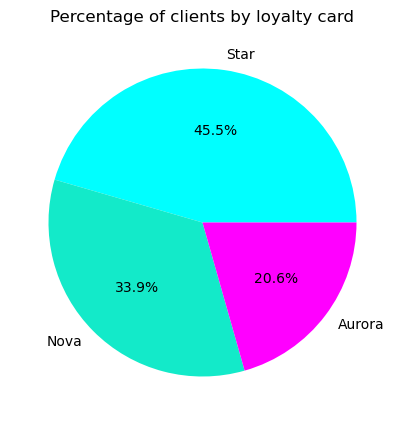

In [177]:
plt.figure(figsize=(5, 5))
plt.pie(porcentaje_clientes, labels=porcentaje_clientes.index, autopct='%1.1f%%', colors=['#00ffff', '#13EAC9', '#FF00FF'])
plt.title('Percentage of clients by loyalty card')

plt.show()

Podemos ver que el gran porcentaje de clientes tienen la categoria STAR,  seguido de nivel intermedio NOVA con un 34% de los clientes.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

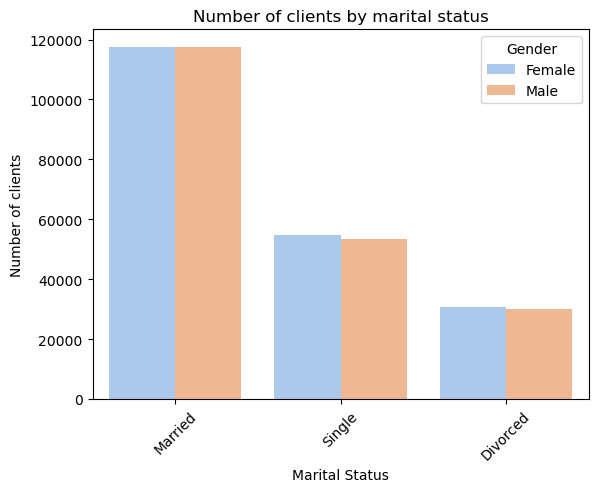

In [164]:
# Voy a usar un countplot
sns.countplot(x = "Marital Status", 
              data = df_final, 
              palette = "pastel", 
              hue = "Gender")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 45)

plt.title("Number of clients by marital status")
plt.xlabel("Marital Status")
plt.ylabel("Number of clients"); 

Podemos observar que tenemos en su mayoría clientes casados seguido de solteros y el grupo donde menor clientes tenemos es en divorciados. Al añadir el genero podemos ver que no existe diferencia significativa alguna entre hombres y mujeres en las distintas categorías de estado civil.

## Fase 3. Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

1. PreparacióndeDatos:

    Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

2. AnálisisDescriptivo:

    Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

3. PruebaEstadística:

    Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.


In [210]:
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

# Filtrar las columnas que nos piden

df_analisis= df_final[['Flights Booked', 'Education']]

# Mostrar las primeras filas del DataFrame filtrado para verificar
print(df_analisis.head())

   Flights Booked Education
0               3  Bachelor
1              10   College
2               6   College
3               0  Bachelor
4               0  Bachelor


In [182]:
# Agrupo los datos por nivel educativo y calculo las estadísticas descriptivas

education_groups = df_analisis.groupby("Education")["Flights Booked"]

descriptive_stats = education_groups.describe().T
descriptive_stats


Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


Estos valores nos muestran que, en promedio, las personas han reservado 4 viajes independientemente del grado educativo.
La desviación típica es similar en todas las categorías, lo que indica que la dispersión es muy similar en los diferentes niveles educativos.
Tenemos un mínimo de 0 vuelos (pudiendo haber categorías sin vuelos registrados) y un máximo de 21 vuelos.
A primera vista no hay ninguna diferencia en los grupos estudiados.

Planteamos dos hipótesis:

Ho (Hipótesis Nula). No hay una diferencia significativa entre los niveles y los grupos educativos.
H1 (Hipótesis Alernativa). Hay una diferencia significativa entre los niveles y los grupos educativos.
    Grupo Control: Educación Superior.
    Grupo Test: Educación Básica.

In [224]:
def clasification_group(education):
    
    if education in ["Doctor", "Master", "Bachelor"]:
        return "Superior"
    else:
        return "Basic"
   

# creo nueva columna para meter los grupos
df_analisis["Group"] = df_analisis["Education"].apply(clasification_group)

In [225]:
df_analisis.head()

,Flights Booked,Education,Group
0,3,Bachelor,Superior
1,10,College,Basic
2,6,College,Basic
3,0,Bachelor,Superior
4,0,Bachelor,Superior


Ahora evaluamos si la distribución es normal y su homogeneidad para ver qué pruebas utilizar

- Si es normal T -Student y test Levene para compromar homogeneidad de varianzas.
- Si no sigue distribución normal pruebas no paramétricas como Mann Whitney.

In [226]:
# Filtramos el DataFrame para quedarnos solo con los datos de los grupos Basic y Superior
basic_group = df_analisis[df_analisis["Group"] == 'Basic']["Flights Booked"]
superior_group = df_analisis[df_analisis["Group"] == 'Superior']["Flights Booked"]

In [227]:
# Para comprobar si las distribuciones del número de vuelos reservados son normales para cada grupo de educación, utilizaré la prueba de Shapiro

p_value = shapiro(df_analisis['Flights Booked']).pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 0.0 )


In [228]:
# Como no se ajusta a una distribución normal tendremos que hacer la prueba de Mann-Whitney 
statistic, p_value = mannwhitneyu(basic_group, superior_group, alternative='two-sided')

# Imprimimos los resultados
print(f'Estadístico U de Mann-Whitney: {statistic}')
print(f'Valor p: {p_value}')

# Interpretamos los resultados
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print('No hay suficiente evidencia para rechazar la hipótesis nula (no hay diferencia significativa entre los grupos).')
else:
    print('Hay evidencia suficiente para rechazar la hipótesis nula (hay diferencia significativa entre los grupos).')


Estadístico U de Mann-Whitney: 17216065553.0
Valor p: 0.002942081262120518
Hay evidencia suficiente para rechazar la hipótesis nula (hay diferencia significativa entre los grupos).





### Conclusiones Finales

Tras realizar la prueba de Mann-Whitney podemos concluir que el nivel educativo influye de manera significativa en el número de vuelos reservados. 

Algunas recomendaciones serían:

- Personalización de Estrategias de Marketing:

    Segmentación del Mercado: Se puede segmentar a los clientes en función de su nivel educativo y adaptar las campañas de marketing para atraer más a estos grupos. Por ejemplo, haciendo campañas de fidelización o promociones específicas en los grupos que reservan más vuelos.

- Optimización de la Oferta de Productos:

    Considera ajustar la oferta de productos y servicios en función de las preferencias de viaje identificadas en cada grupo educativo. Por ejemplo, si los clientes con educación superior reservan más vuelos, se podría introducir programas de recompensas más atractivos para este segmento.



### Next Steps:

Investigación Cualitativa: Considera llevar a cabo estudios cualitativos, como encuestas para entender mejor por qué el nivel educativo influye en las reservas de vuelos. Esto nos dará una comprensión más profunda y permitirá estrategias más precisas.
